In [3]:
import numpy as np

In [4]:
n_stories = 10
bound = 3

In [5]:
position_x = np.array([0,1,1,2,-2,-3,0,-2,0,2])

bins = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))

positionsAtT = np.histogram(position_x, bins)[0]

print(positionsAtT)

[1 2 0 3 2 2 0]


In [6]:
filledPositions = positionsAtT[positionsAtT !=0 ]

print(filledPositions)

[1 2 3 2 2]


In [7]:
n_stories = 10

probabilities = filledPositions/n_stories

print(probabilities)

[0.1 0.2 0.3 0.2 0.2]


In [8]:
entropy_i = -1*probabilities*np.log(probabilities)

print(entropy_i)

[0.23025851 0.32188758 0.36119184 0.32188758 0.32188758]


In [9]:
entropy = np.sum(entropy_i)
print(entropy)

1.5571130980576458


In [10]:
def OneDEntropy(positions, t_max, n_stories, bound):
    bins = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram(positions[:,i],bins = bins)[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$OneDEntropy$")
    plt.show()

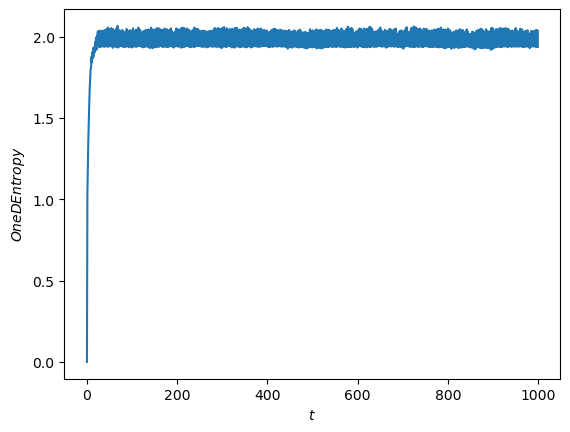

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def OneDDiffusion(n_stories, t_max,bound):
    t = np.arange(t_max)
    # Steps can be -1 or 1 (note that randint excludes the upper limit)
    steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1
    positions=np.cumsum(steps,axis=1)
    initialPosition = np.zeros(n_stories)
    positions[:,0]= initialPosition
    boundaries=np.where(abs(positions)>bound)
    boundaries = np.array(boundaries)
    
    while len(boundaries[0]) > 0:
        idx = -1
        for id in range(0,len(boundaries[0])):
            if not boundaries[0][id] > idx: continue    
            if steps[boundaries[0][id]][boundaries[1][id]] == -1:
                steps[boundaries[0][id]][boundaries[1][id]] = 1
            else:
                steps[boundaries[0][id]][boundaries[1][id]] = -1
            idx = boundaries[0][id]
        positions = np.cumsum(steps, axis=1)
        positions[:,0]=initialPosition
        boundaries=np.array(np.where(abs(positions)>bound))
    return positions

def OneDEntropy(positions, t_max, n_stories, bound):
    bins = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram(positions[:,i],bins = bins)[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$OneDEntropy$")
    plt.show()
        
def TwoDDiffusion(n_stories, t_max,bound):
    positionx = OneDDiffusion(n_stories, t_max,bound)
    positiony = OneDDiffusion(n_stories, t_max,bound)
    # print ("X ----")
    # print(positionx)
    # print ("Y ----")
    # print(positiony)
    positionxy = np.zeros((n_stories, t_max,2))
    positionxy[:,:, 0] = positionx
    positionxy[:,:, 1] = positiony
    return positionxy

n_stories = 500
t_max = 1000
bound = 7
positions = OneDDiffusion(n_stories, t_max,bound)
OneDEntropy(positions, t_max, n_stories, bound)

In [13]:
n_stories = 5
t_max = 1
bound = 3

positionxy = TwoDDiffusion(n_stories, t_max,bound)

print(positionxy)

[[[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]]


In [31]:
n_stories = 5
t_max = 2
bound = 3

positionxy = TwoDDiffusion(n_stories, t_max,bound)

print(positionxy)

[[[ 0.  0.]
  [ 2. -2.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0. -2.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0. -2.]]]


In [17]:
bound = 2
positionxy = np.array([[0,0],[1,1],[1,1],[-2,2]])

bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))

positionsAtT = np.histogram2d(positionxy[:,0],positionxy[:,1], bins=(bins_x, bins_y))[0]
print(positionsAtT)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0.]]


In [18]:
filledPositions = positionsAtT[positionsAtT !=0 ]

print(filledPositions)

[1. 1. 2.]


In [19]:
n_stories = 4
probabilities = filledPositions/n_stories
print("probabilities:",probabilities)
entropy_i = -1*probabilities*np.log(probabilities)
print(entropy_i)
print("entopy",np.sum(entropy_i))

probabilities: [0.25 0.25 0.5 ]
[0.34657359 0.34657359 0.34657359]
entopy 1.0397207708399179


In [39]:
n_stories = 500
t_max = 1000
bound = 7

positionxy = TwoDDiffusion(n_stories, t_max,bound)

In [40]:
def TwoDEntropy(positionxy, t_max, n_stories, bound):
    
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    
    positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]

In [41]:
def TwoDEntropy(positionxy, t_max, n_stories, bound):
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        

In [42]:
def TwoDEntropy(positionxy, t_max, n_stories, bound):
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)


In [48]:
def TwoDEntropy(positionxy, t_max, n_stories, bound):
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$TwoDEntropy$")
    plt.show()

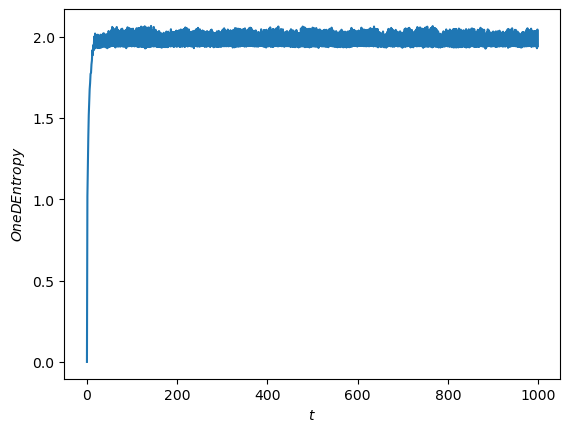

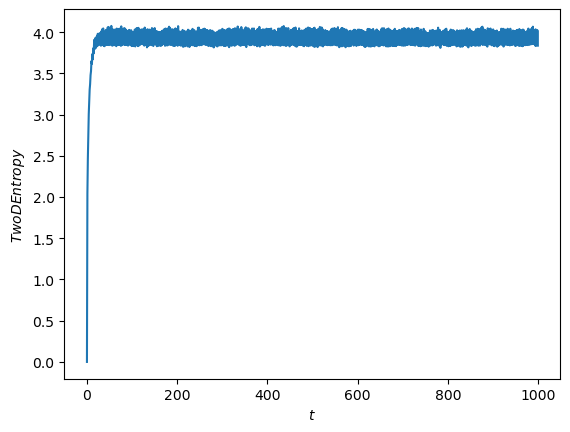

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def OneDDiffusion(n_stories, t_max,bound):
    t = np.arange(t_max)
    # Steps can be -1 or 1 (note that randint excludes the upper limit)
    steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1
    positions=np.cumsum(steps,axis=1)
    initialPosition = np.zeros(n_stories)
    positions[:,0]= initialPosition
    boundaries=np.where(abs(positions)>bound)
    boundaries = np.array(boundaries)
    
    while len(boundaries[0]) > 0:
        idx = -1
        for id in range(0,len(boundaries[0])):
            if not boundaries[0][id] > idx: continue    
            if steps[boundaries[0][id]][boundaries[1][id]] == -1:
                steps[boundaries[0][id]][boundaries[1][id]] = 1
            else:
                steps[boundaries[0][id]][boundaries[1][id]] = -1
            idx = boundaries[0][id]
        positions = np.cumsum(steps, axis=1)
        positions[:,0]=initialPosition
        boundaries=np.array(np.where(abs(positions)>bound))
    return positions

def OneDEntropy(positions, t_max, n_stories, bound):
    bins = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram(positions[:,i],bins = bins)[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$OneDEntropy$")
    plt.show()



def TwoDEntropy(positionxy, t_max, n_stories, bound):
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$TwoDEntropy$")
    plt.show()

        
def TwoDDiffusion(n_stories, t_max,bound):
    positionx = OneDDiffusion(n_stories, t_max,bound)
    positiony = OneDDiffusion(n_stories, t_max,bound)
    # print ("X ----")
    # print(positionx)
    # print ("Y ----")
    # print(positiony)
    positionxy = np.zeros((n_stories, t_max,2))
    positionxy[:,:, 0] = positionx
    positionxy[:,:, 1] = positiony
    return positionxy

n_stories = 500
t_max = 1000
bound = 7
positions = OneDDiffusion(n_stories, t_max,bound)
OneDEntropy(positions, t_max, n_stories, bound)


n_stories = 500
t_max = 1000
bound = 7
positionxy = TwoDDiffusion(n_stories, t_max,bound)
TwoDEntropy(positionxy, t_max, n_stories, bound)

# سوال اول

In [50]:
#state = [theta, omega]
#params = [g,l]

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])

In [53]:
def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])
Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states = np.zeros((nSteps,2))
states[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t = 0 + dt

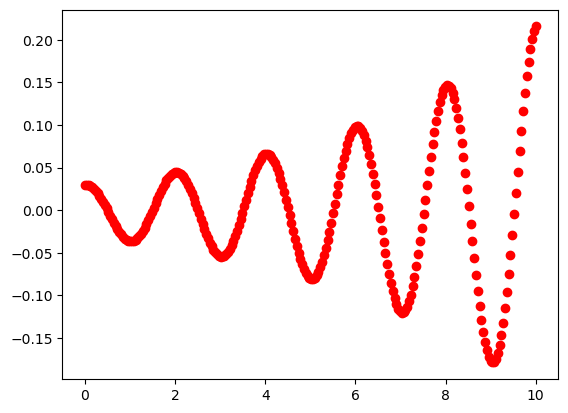

In [58]:
def Euler(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    derive = derive*dt
    return state+derive

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])
Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states = np.zeros((nSteps,2))
states[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t= 0 + dt

for i in range(1,nSteps):
    newstateE = Euler(states[i-1,:], t, dt, derivative, params)
    states[i,:] = newstateE

plt.plot(t2, states[:,0], 'ro')
plt.show()

In [59]:
def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState


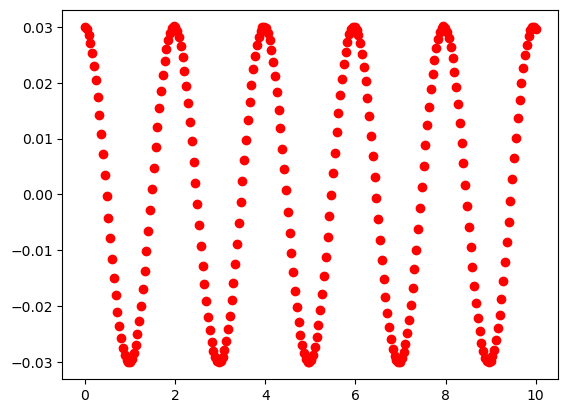

In [64]:
def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState

def derivative(state, t, params):
    d_theta = state[1] # omega_i
    d_omega = -1*state[0]*params[0]/params[1] # -(g/l)*theta_i
    return np.array([d_theta, d_omega])

Ti = 0
Tf = 10
dt = 0.04
nSteps = int((Tf-Ti)/dt)


states2 = np.zeros((nSteps,2))
states2[0,:] = [0.03,0] #state = [theta, omega]
params = np.array([10,1]) #params = [g,l]

t2 = np.linspace(0, 10, nSteps)
t= 0 + dt

for i in range(1,nSteps):
    newstateEC = Euler_Cromer(states2[i-1,:], t, dt, derivative, params)
    states2[i,:] =newstateEC

plt.plot(t2, states2[:,0], 'ro')
plt.show()

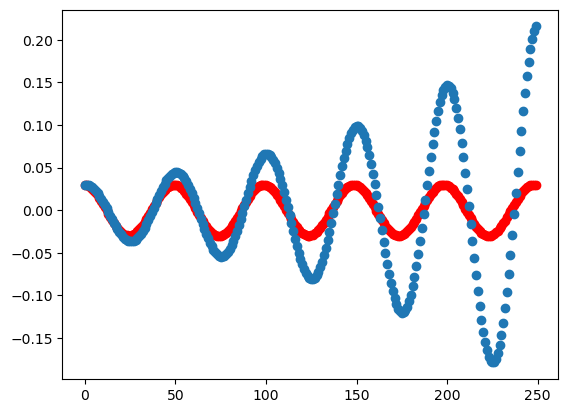

In [65]:
def Euler(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    derive=derive*dt
    return state+derive
#state = [theta, omega]
#params = [g,l]
def derivative(state, t, params):
    return np.array([state[1], -1*state[0]*params[0]/params[1]])

def Euler_Cromer(state, t, dt, derivative, params):
    derive = derivative(state,t, params)
    nextState = [0,0]
    nextState[1] = state[1]+derive[1]*dt
    nextState[0] = state[0]+nextState[1]*dt
    return nextState

# Pendulum equation
# Approximate sin theta with theta
import numpy as np
import matplotlib.pyplot as plt

Tf = 10
dt = 0.04
nSteps = int(Tf/dt)
states = np.zeros((nSteps,2))
states[0,:] = [0.03,0]
params = np.array([10,1])
states2 = np.zeros((nSteps,2))
states2[0,:] = [0.03,0]
t2 = np.arange(nSteps)
t=1
for i in range(1,len(t2)):
    newstateE = Euler(states[i-1,:], t, dt, derivative, params)
    states[i,:] =newstateE
    newstateEC = Euler_Cromer(states2[i-1,:], t, dt, derivative, params)
    states2[i,:] =newstateEC

plt.plot(t2, states2[:,0], 'ro')
plt.plot(t2, states[:,0], 'o')
plt.show()

# سوال 2

In [67]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

Integral using sum:  0.97502383217623


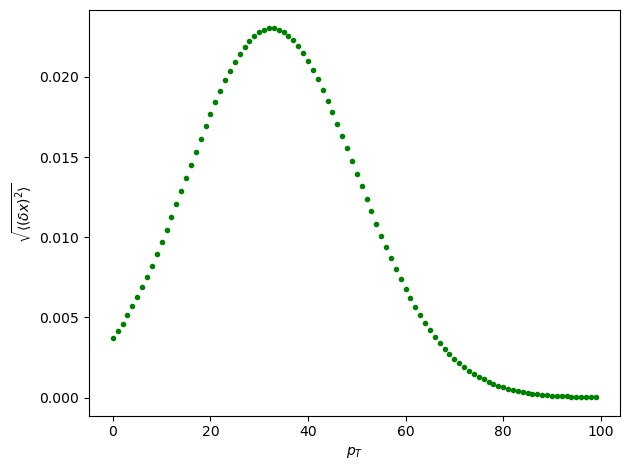

In [69]:
mu=300
loc= -267
x= np.arange(100)
dist=poisson.pmf(x, mu, loc)
print ("Integral using sum: ", np.sum(dist))
plt.plot(x, (dist), 'g.') 
plt.xlabel(r"$p_{T}$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout()
plt.show()

In [74]:
count = 0
mymax=np.max(dist)
print ("Integral using sum: ", np.sum(dist))

for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if poisson.pmf(xi, mu, loc) > yi:
        count+=1
    
print("Integral using MC method: ", 100*mymax*float(count)/100000)


Integral using sum:  0.97502383217623
Integral using MC method:  0.9723419642418902


In [75]:
count = 0
count2 = 0 
for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if poisson.pmf(xi, mu, loc) > yi:
        count+=1
        if xi > 20: 
            count2+=1
print("The probability for p > 20 GeV: ",float(count2)/float(count))

The probability for p > 20 GeV:  0.7826272290240841


Integral using sum:  0.97502383217623
Maximum probability (haight of the rectangle to integrate):  0.023026546149191047
Integral using MC method:  0.9831183878397116
The probability for p > 20 GeV:  0.7822695866026467


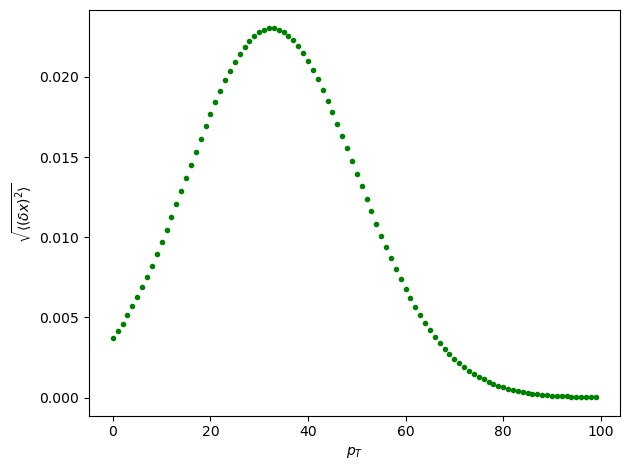

In [76]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
mu=300
loc= -267
x= np.arange(100)
dist=poisson.pmf(x, mu, loc)
print ("Integral using sum: ", np.sum(dist))
mymax=np.max(dist)
print ("Maximum probability (haight of the rectangle to integrate): ", mymax)
count = 0
count2 = 0 
for i in range(100000):
    xi = int(np.random.uniform(0,100))
    yi = np.random.uniform(0,mymax)
    if poisson.pmf(xi, mu, loc) > yi:
        count+=1
        if xi > 20: 
            count2+=1
print("Integral using MC method: ", 100*mymax*float(count)/100000)
print("The probability for p > 20 GeV: ",float(count2)/float(count))

plt.plot(x, (dist), 'g.') 
plt.xlabel(r"$p_{T}$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout()
plt.show()